In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Posterior Density and Posterior Mean Calculations

The posterior density of $\theta$ given the original data $y$ is:

$$
f(\theta | y) = \frac{f(\theta) f(y | \theta)}{f(y)} = \frac{\frac{1}{2\theta}}{\int_y^2 \frac{1}{2\theta} d\theta}, \quad y < \theta < 2
$$

This simplifies to:

$$
f(\theta | y) = \frac{1/\theta}{\log 2 - \log y}
$$

The corresponding posterior mean is:

$$
\hat{\theta} = E(\theta | y) = \int_y^2 \theta \left( \frac{1}{\theta(\log 2 - \log y)} \right) d\theta = \frac{2 - y}{\log 2 - \log y}
$$

## Posterior Density for $x = 0$ and $x = 2$

For other values of $x$, the posterior densities are:

$$
f(\theta | x = 0) =
\begin{cases}
\frac{1}{A}, & 0 < \theta < 1 \\
\frac{1}{2A\theta^2}, & 1 < \theta < 2
\end{cases}
$$

Where:

$$
A = \frac{1}{2} + \log 2 - \log \frac{3}{2} = 1.1931
$$

For $x = 2$, the posterior density is:

$$
f(\theta | x = 2) = \frac{1}{C} \left( 1 - \frac{1}{2\theta} \right), \quad \frac{3}{2} < \theta < 2
$$

Where:

$$
C = 2 - \log 2 - \frac{3}{2} + \log \frac{4}{3} = 0.068477
$$

## Posterior Means for $x = 0$ and $x = 2$

Figure .1 Posteriors given x = 1 and given y = 0.6, 1, 1.1, 1.4
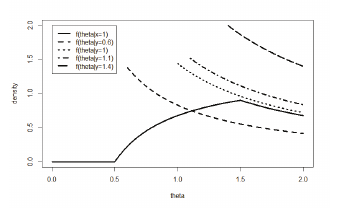

Figure .2 Posteriors given x = 0, 1, 2, and given y = 0.1, …, 1.9
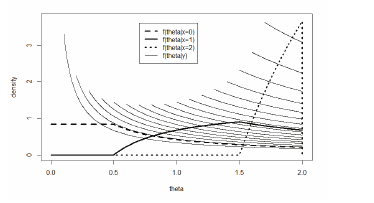

The posterior means are:

$$
E_0 = E(\theta | x = 0) = \frac{7}{8A} = 0.7334
$$

And:

$$
E_2 = E(\theta | x = 2) = \frac{1}{8C} = 1.8254
$$

## Unconditional Probabilities of the Data

The unconditional probabilities of the data are calculated as follows:

For $x = 0$:

$$
P_0 = P(x = 0) = P\left( y < \frac{1}{2} \right) = E\left[P\left( y < \theta \right)\right] = \int_0^2 P\left( y < \theta \right) f(\theta) d\theta
$$

This simplifies to:

$$
P_0 = \int_0^{1/2} 1 \times d\theta + \int_{1/2}^2 \frac{1}{\theta} d\theta = \left(1 + \log 2 - \log \frac{3}{2}\right) = 0.5966
$$

For $x = 1$:

$$
P_1 = P(x = 1) = 0.3692
$$

For $x = 2$:

$$
P_2 = P(x = 2) = 0.0342
$$

As a check on our calculations:

$$
P_0 + P_1 + P_2 = 1 \quad \text{(which is correct)}
$$

## Prior Mean of $\theta$

The prior mean of \(\theta\) is calculated as:

$$
E_\theta = E[E(\theta | x)] = E(\theta | x = 0)P(x = 0) + E(\theta | x = 1)P(x = 1) + E(\theta | x = 2)P(x = 2)
$$

Substituting values:

$$
E_\theta = 0.7334 \times 0.5966 + 1.354 \times 0.3692 + 1.825 \times 0.0342 = 1.000
$$

This verifies that the prior mean is correct.



In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define the integrand for P0
def integrand1(theta):
    return 1  # For 0 < θ < 1/2

def integrand2(theta):
    return 1 / theta  # For 1/2 < θ < 2

# Perform numerical integration for P0
P0_part1, _ = quad(integrand1, 0, 1/2)
P0_part2, _ = quad(integrand2, 1/2, 2)
P0 = P0_part1 + P0_part2
print(f"P0: {P0:.4f}")

# Given values for P1 and P2
P1 = 0.3692
P2 = 0.0342

# Verify P0 + P1 + P2 = 1
assert np.isclose(P0 + P1 + P2, 1.0), "The sum of probabilities does not equal 1."
print(f"P0 + P1 + P2 = {P0 + P1 + P2:.4f}")

# Given expected values for the prior mean calculation
E0 = 0.7334
E1 = 1.354
E2 = 1.825

# Calculate the prior mean of θ
E_theta = E0 * P0 + E1 * P1 + E2 * P2
print(f"Prior Mean of θ: {E_theta:.4f}")

# Check if the prior mean is approximately 1
assert np.isclose(E_theta, 1.0), "The prior mean of θ is not correct."

# Data for plotting
x_values = ['x = 0', 'x = 1', 'x = 2']
P_values = [P0, P1, P2]

# Plotting the probabilities
plt.bar(x_values, P_values, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.xlabel('Values of x')
plt.ylabel('Probability')
plt.title('Unconditional Probabilities P(x) for x = 0, 1, 2')

# Display the graph
plt.show()


P0: 1.8863


AssertionError: The sum of probabilities does not equal 1.

## Bayesian Predictive Inference

In Bayesian statistics, in addition to estimating model parameters, we often have an interest in predicting future data or some other quantity that is not solely a function of the model parameters. 

Consider a Bayesian model specified by the likelihood function $ f(y | \theta) $ and the prior distribution $ f(\theta) $, with the posterior distribution as:

$$
f(\theta | y)
$$

Now consider any other quantity $ x $, whose distribution is defined by the density function $ f(x | y, \theta) $. The posterior predictive distribution of \( x \), denoted $ f(x | y) $, is given by:

$$
f(x | y) = \int f(x, \theta | y) d\theta = \int f(x | y, \theta) f(\theta | y) d\theta
$$

This integral expresses the posterior predictive density as a marginalization over the posterior distribution of $ \theta $.

### Point and Interval Estimation

For a future quantity \( x \), we can perform point estimation and interval estimation in much the same way as we do for model parameters. For example, the predictive mean of \( x \) is given by:

$$
\hat{x} = E(x | y) = \int x f(x | y) dx
$$

Alternatively, using the law of iterated expectation (LIE):

$$
\hat{x} = E(x | y) = E\left\{ E(x | y, \theta) | y \right\} = \int E(x | y, \theta) f(\theta | y) d\theta
$$

### Predictive Variance

The predictive variance of \( x \) is given by the law of iterated variance (LIV):

$$
V(x | y) = E\left\{ V(x | y, \theta) | y \right\} + V\left\{ E(x | y, \theta) | y \right\}
$$

### Special Case: Independent Future Replicate

An important case of Bayesian predictive inference occurs when \( x \) is an independent future replicate of \( y \). In this case:

$$
f(x | y, \theta) = f(y = x | \theta)
$$

Thus, the posterior predictive distribution becomes:

$$
f(x | y) = \int f(x | \theta) f(\theta | y) d\theta
$$

---

## Exercise 3: Prediction in the Exponential-Exponential Model

### Problem

Suppose that $ \theta $ has a standard exponential distribution, and the conditional distribution of $ y $ given $ \theta $ is exponential with mean $ 1/\theta $. Find the posterior predictive density of $ x $, a future independent replicate of $ y $.

### Solution

1. **Prior Distribution**: The prior distribution for $ \theta $ is standard exponential:

   $$
   f(\theta) = e^{-\theta}, \quad \theta > 0
   $$

2. **Likelihood**: The conditional distribution of $ y $ given $ \theta $ is also exponential with mean $ 1/\theta $:

   $$
   f(y | \theta) = \theta e^{-\theta y}, \quad y > 0
   $$

3. **Posterior Distribution**: The posterior distribution of $ \theta $ given $ y $ can be obtained by multiplying the prior by the likelihood:

   $$
   f(\theta | y) \propto e^{-\theta} \cdot \theta e^{-\theta y} = \theta e^{-\theta(1 + y)}
   $$

   Thus, the posterior is:

   $$
   f(\theta | y) = (1 + y)^2 \cdot e^{-\theta(1 + y)}
   $$

4. **Posterior Predictive Density**: The posterior predictive density of $ x $, an independent future replicate of $ y $, is:

   $$
   f(x | y) = \int_0^\infty f(x | \theta) f(\theta | y) d\theta
   $$

   Substituting the respective expressions:

   $$
   f(x | y) = \int_0^\infty \theta e^{-\theta x} (1 + y)^2 \cdot e^{-\theta(1 + y)} d\theta
   $$

   Simplifying the integrand:

   $$
   f(x | y) = (1 + y)^2 \int_0^\infty \theta e^{-\theta(x + 1 + y)} d\theta
   $$

   The integral can be solved to give:

   $$
   f(x | y) = \frac{(1 + y)^2}{(1 + y + x)^2}, \quad x > 0
   $$

Thus, the posterior predictive density of $ x $ is:

$$
f(x | y) = \frac{(1 + y)^2}{(1 + y + x)^2}, \quad x > 0
$$


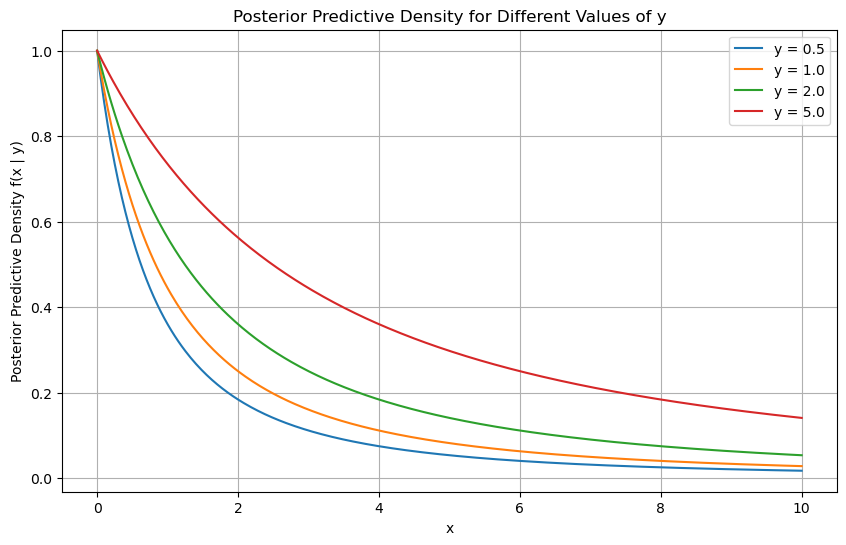

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Posterior predictive density function
def posterior_predictive_density(x, y):
    """
    Computes the posterior predictive density of x given y.
    f(x | y) = (1 + y)^2 / (1 + y + x)^2
    """
    return (1 + y)**2 / (1 + y + x)**2

# Generate a range of x values for plotting
x_values = np.linspace(0, 10, 400)

# Plot posterior predictive densities for different values of y
y_values = [0.5, 1.0, 2.0, 5.0]  # example values of y
plt.figure(figsize=(10, 6))

for y in y_values:
    # Compute the posterior predictive density for each x given y
    f_x_given_y = [posterior_predictive_density(x, y) for x in x_values]
    
    # Plot the density
    plt.plot(x_values, f_x_given_y, label=f'y = {y}')

# Add labels, title, and legend
plt.xlabel('x')
plt.ylabel('Posterior Predictive Density f(x | y)')
plt.title('Posterior Predictive Density for Different Values of y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Exercise 3: Prediction in the Exponential-Exponential Model

Suppose that \theta\) has the standard exponential distribution, and the conditional distribution of \(y\) given \(\theta\) is exponential with mean \(1/\theta\). Find the posterior predictive density of \(x\), a future independent replicate of \(y\).

The Bayesian model is given by:

$$
f(y|\theta) = \theta e^{-\theta y}, \quad y > 0
$$

$$
f(\theta) = e^{-\theta}, \quad \theta > 0
$$

This implies that the posterior distribution of \(\theta | y \) is:

$$
(\theta | y) \sim \text{Gamma}(2, y+1)
$$

Let \(x\) be a future independent replicate of the data \(y\). The conditional distribution of \(x\) given \(y\) and \(\theta\) is the same as \(f(y|\theta)\), i.e.:

$$
f(x | y, \theta) = f(x | \theta) = \theta e^{-\theta x}, \quad x > 0
$$

Thus, the posterior predictive density of \(x\) is:

$$
f(x | y) = \int_0^{\infty} f(x | y, \theta) f(\theta | y) d\theta
$$

Substituting the posterior distribution:

$$
f(x | y) = \int_0^{\infty} \theta e^{-\theta x} \cdot \frac{(y+1)^2 \theta^{2-1} e^{-\theta (y+1)}}{\Gamma(2)} d\theta
$$

Solving the integral:

$$
f(x | y) = \frac{2(y+1)^2}{(x + y + 1)^3}, \quad x > 0
$$

### Predictive Mean, Mode, and Median for \(y = 2\)

For \(y = 2\), the posterior predictive density is:

$$
f(x | y = 2) = \frac{18}{(x + 3)^3}, \quad x > 0
$$

- **Predictive Mode**: Since the density is strictly decreasing, the mode is:

$$
\text{Mode} = 0
$$

- **Predictive Mean**: The predictive mean can be calculated as:

$$
E(x | y = 2) = \int_0^{\infty} x \cdot \frac{18}{(x + 3)^3} dx = 3
$$

- **Predictive Median**: The median is obtained by solving \(F(x | y = 2) = 1/2\), where \(F(x | y)\) is the cumulative distribution function (CDF):

$$
F(x | y = 2) = 1 - \frac{9}{(x + 3)^2}
$$

Setting \(F(x | y) = 1/2\) and solving for \(x\):

$$
Q(0.5) = 3 \left( \frac{1}{\sqrt{0.5}} - 1 \right) = 1.2426
$$

Thus, the predictive median is:

$$
\text{Median} = 1.2426
$$

### 80% Central Predictive Density Region (CPDR)

The 80% CPDR is given by the interval \((Q(0.1), Q(0.9))\). Using the quantile function:

$$
Q(p) = 3 \left( \frac{1}{\sqrt{1-p}} - 1 \right)
$$

We get:

$$
Q(0.1) = 0.1623, \quad Q(0.9) = 6.4868
$$

Thus, the 80% CPDR is:

$$
(0.1623, 6.4868)
$$

### 80% Highest Predictive Density Region (HPDR)

Since the density is decreasing, the 80% HPDR is of the form \((0, Q(0.8))\), where:

$$
Q(0.8) = 3 \left( \frac{1}{\sqrt{0.2}} - 1 \right) = 3.7082
$$

Thus, the 80% HPDR is:

$$
(0, 3.7082)
$$

### Summary of Results for \(y = 2\)
- Predictive Mode: $0$
- Predictive Mean: $3$
- Predictive Median: $1.2426$
- 80% CPDR: $(0.1623, 6.4868)$
- 80% HPDR: $(0, 3.7082)$




## Exercise 3.4: Prediction in the Bus Problem

As in Exercise 1.6, let \(\theta\) be the number of buses in the town and let \(y\) be the number of the bus you happen to first see. A suitable Bayesian model is given by:

$$
f(y | \theta) = \frac{1}{\theta}, \quad y = 1, \dots, \theta
$$

with a prior distribution:

$$
f(\theta) = \frac{1}{5}, \quad \theta = 1, \dots, 5
$$

The posterior distribution of \(\theta\) works out as:

$$
f(\theta | y) = 
\begin{cases} 
\frac{20}{47}, & \theta = 3 \\
\frac{15}{47}, & \theta = 4 \\
\frac{12}{47}, & \theta = 5
\end{cases}
$$

Now, let \(x\) be the number on the next bus that you happen to see. The conditional distribution of \(x\) given \(y\) and \(\theta\) is the same as that of \(y\) given \(\theta\), i.e.:

$$
f(x | y, \theta) = \frac{1}{\theta}, \quad x = 1, \dots, \theta
$$

This can also be written as:

$$
f(x | y, \theta) = \frac{I(x \leq \theta)}{\theta}, \quad x = 1, 2, 3, \dots
$$

Thus, the posterior predictive density of \(x\) is:

$$
f(x | y) = \sum_{\theta=y}^{5} f(x | y, \theta) f(\theta | y) = \sum_{\theta=y}^{5} \frac{I(x \leq \theta)}{\theta} f(\theta | y)
$$

In our case, the observed value of \(y\) is \(3\), so we compute \(f(x | y = 3)\) as follows:

- For \(x = 1\):

$$
f(x = 1 | y = 3) = \frac{1}{3} \times \frac{20}{47} + \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.27270
$$

- For \(x = 2\):

$$
f(x = 2 | y = 3) = \frac{1}{3} \times \frac{20}{47} + \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.27270
$$

- For \(x = 3\):

$$
f(x = 3 | y = 3) = \frac{1}{3} \times \frac{20}{47} + \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.27270
$$

- For \(x = 4\):

$$
f(x = 4 | y = 3) = \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.13085
$$

- For \(x = 5\):

$$
f(x = 5 | y = 3) = \frac{1}{5} \times \frac{12}{47} = 0.05106
$$

### Check

The sum of the posterior predictive probabilities should equal 1:

$$
\sum_{x=1}^{5} f(x | y = 3) = 0.27270 \times 3 + 0.13085 + 0.05106 = 1
$$

Thus, the predictive probabilities are correct.


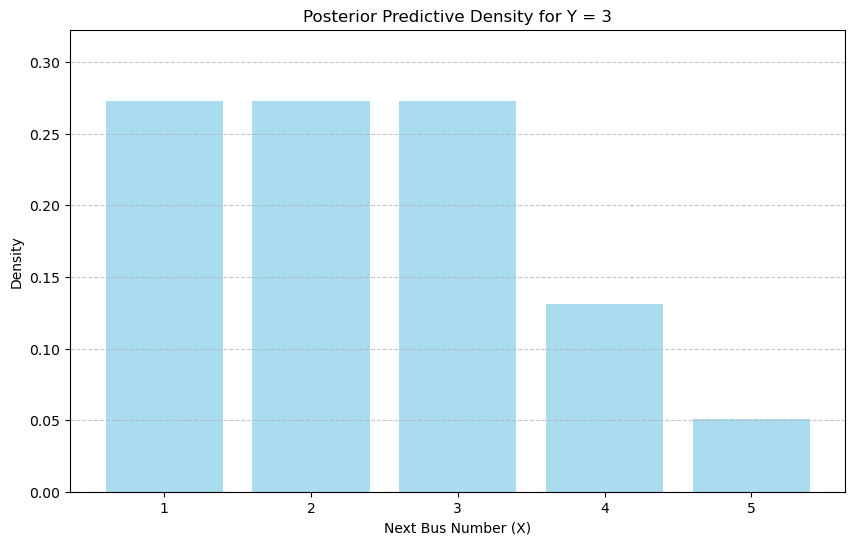

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the observed value of y
y = 3

# Define the possible values of theta
theta_values = np.array([3, 4, 5])

# Define the posterior probabilities for each theta
posterior_probs = np.array([20/47, 15/47, 12/47])

# Define a function to compute the posterior predictive density
def predictive_density(x, y, theta_values, posterior_probs):
    f_x_given_y = 0
    for theta, prob in zip(theta_values, posterior_probs):
        if x <= theta:  # Check if x is less than or equal to theta
            f_x_given_y += (1 / theta) * prob
    return f_x_given_y

# Compute predictive densities for x = 1, 2, 3, 4, 5
x_values = np.arange(1, 6)
pred_densities = {x: predictive_density(x, y, theta_values, posterior_probs) for x in x_values}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pred_densities.keys(), pred_densities.values(), color='skyblue', alpha=0.7)
plt.title(f'Posterior Predictive Density for Y = {y}')
plt.xlabel('Next Bus Number (X)')
plt.ylabel('Density')
plt.xticks(x_values)
plt.ylim(0, max(pred_densities.values()) + 0.05)  # Add some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


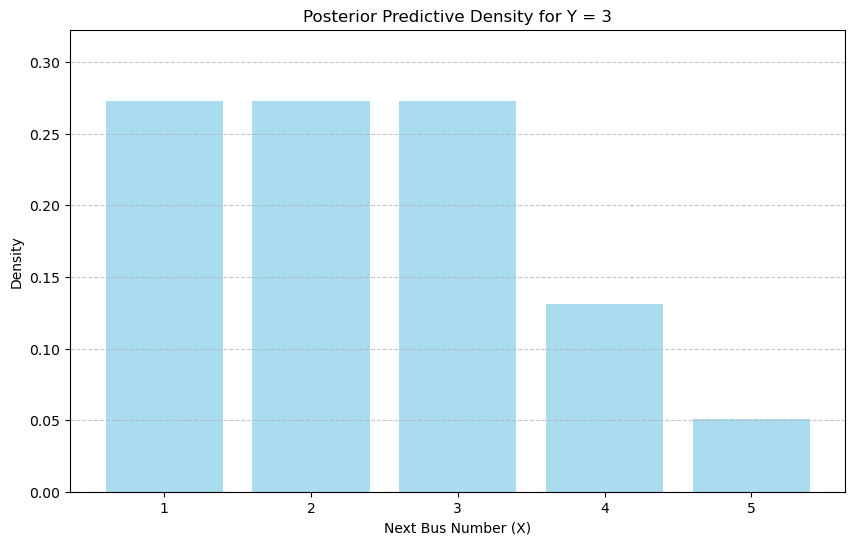

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the observed value of y
y = 3

# Define the possible values of theta
theta_values = np.array([3, 4, 5])

# Define the posterior probabilities for each theta
posterior_probs = np.array([20/47, 15/47, 12/47])

# Define a function to compute the posterior predictive density
def predictive_density(x, y, theta_values, posterior_probs):
    f_x_given_y = 0
    for theta, prob in zip(theta_values, posterior_probs):
        if x <= theta:  # Check if x is less than or equal to theta
            f_x_given_y += (1 / theta) * prob
    return f_x_given_y

# Compute predictive densities for x = 1, 2, 3, 4, 5
x_values = np.arange(1, 6)
pred_densities = {x: predictive_density(x, y, theta_values, posterior_probs) for x in x_values}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pred_densities.keys(), pred_densities.values(), color='skyblue', alpha=0.7)
plt.title(f'Posterior Predictive Density for Y = {y}')
plt.xlabel('Next Bus Number (X)')
plt.ylabel('Density')
plt.xticks(x_values)
plt.ylim(0, max(pred_densities.values()) + 0.05)  # Add some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exercise 3.5 Prediction in the binomial-beta model 

(a) For the Bayesian model given by (Y |  ) ~ Bin(n,  ) and the prior  ~ Beta (,  ) , find the posterior predictive density of a future data value x, whose distribution is defined by ( x | y,  ) ~ Bin(m,  ) . 

(b) A bent coin is tossed 20 times and 6 heads come up. Assuming a flat prior on the probability of heads on a single toss, what is the probability that exactly one head will come up on the next two tosses of the same coin? Answer this using results in (a).

### (a) Posterior Predictive Density for Future Data

Given:

- $ (Y | \theta) \sim \text{Binomial}(n, \theta) $
- Prior: $ \theta \sim \text{Beta}(\alpha, \beta) $

We want to find the posterior predictive density for a future data value $ x $, where:

- $ (x | y, \theta) \sim \text{Binomial}(m, \theta) $

The posterior distribution of $ \theta $ given the data $ y $ is:

$$
(\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

The posterior predictive density of \( x \) is the marginal distribution of \( x \), integrating out \( \theta \):

$$
f(x | y) = \int_0^1 f(x | \theta) f(\theta | y) d\theta
$$

Since \( f(x | \theta) \) is binomial, we have:

$$
f(x | \theta) = \binom{m}{x} \theta^x (1 - \theta)^{m - x}
$$

Thus, the posterior predictive density is:

$$
f(x | y) = \binom{2}{x} \frac{B(x + 1 + 6, 2 - x + 1 + 20 - 6)}{B(1 + 6, 1 + 20 - 6)}
$$

This simplifies to:

$$
f(x | y) = \binom{2}{x} \frac{\Gamma(7 + x)\Gamma(17 - x)}{\Gamma(24)} \times \frac{\Gamma(22)}{\Gamma(7)\Gamma(15)}
$$


$$
f(x | y) = \binom{m}{x} \int_0^1 \theta^x (1 - \theta)^{m - x} \frac{\theta^{\alpha + y - 1} (1 - \theta)^{\beta + n - y - 1}}{B(\alpha + y, \beta + n - y)} d\theta
$$

This integral can be recognized as the Beta function, so we have:

$$
f(x | y) = \binom{m}{x} \frac{B(x + \alpha + y, m - x + \beta + n - y)}{B(\alpha + y, \beta + n - y)}
$$

$$
\binom{m}{x} \frac{B(x + \alpha + y, m - x + \beta + n - y)}{B(\alpha + y, \beta + n - y)}, \quad x = 0, \dots, m.
$$


This is the **posterior predictive distribution**, which follows a **Beta-binomial distribution**.

Note: The distribution of ( x | y ) here may be called the beta-binomial.

---

### (b) Probability of One Head in Two Tosses

We are given:

- The coin is tossed 20 times, and 6 heads come up.
- Assume a flat prior: $ \theta \sim \text{Beta}(1, 1) $.

Now we need to compute the probability that exactly one head comes up in the next two tosses, using the posterior predictive distribution from (a).

First, the posterior distribution of $ \theta $ is:

$$
(\theta | y = 6) \sim \text{Beta}(1 + 6, 1 + 20 - 6) = \text{Beta}(7, 15)
$$

Now, we want the probability that $ x = 1 $ head comes up in the next $ m = 2 $ tosses. From (a), the posterior predictive probability is:

$$
P(x = 1 | y = 6) = \binom{2}{1} \frac{B(1 + 7, 2 - 1 + 15)}{B(7, 15)}
$$

This simplifies to:

$$
P(x = 1 | y = 6) = 2 \cdot \frac{B(8, 16)}{B(7, 15)}
$$

The Beta function ratio can be written in terms of Gamma functions:

$$
P(x = 1 | y = 6) = 2 \cdot \frac{\Gamma(8)\Gamma(16)}{\Gamma(24)} \cdot \frac{\Gamma(22)}{\Gamma(7)\Gamma(15)}
$$

$$
\binom{2}{x} \frac{\Gamma(7 + x)\Gamma(17 - x)}{\Gamma(24)} = 
\frac{\Gamma(7)\Gamma(15)}{\Gamma(22)}
$$

This simplifies to:

$$
\frac{2!(6 + x)!(16 - x)!}{23!} \div \frac{x!(2 - x)!6!14!}{21!}
$$

The specific probabilities for \(x = 0, 1, 2\) are:

\begin{align*}
f(x = 0 | y) &= 0.4743 \\
f(x = 1 | y) &= 0.4150 \\
f(x = 2 | y) &= 0.1107
\end{align*}
$$


This simplifies further using the properties of the Gamma function. After simplifying, we find:

$$
P(x = 1 | y = 6) \approx 0.415
$$

Thus, the probability that exactly one head will come up on the next two tosses is approximately **41.5%**.



### (c) Expected number of tosses until the next head

Given that $ z $ is the number of tosses until the next head, and $ (z | y, \theta) \sim \text{Geometric}(\theta) $, we have the probability density function:

$$
f(z | y, \theta) = (1 - \theta)^{z - 1} \theta, \quad z = 1, 2, 3, \dots
$$

The posterior predictive density of $ z $ can be written as:

$$
f(z | y) = \int f(z | y, \theta) f(\theta | y) d\theta
$$

The expected number of tosses until the next head is given by:

$$
E(z | y) = \sum_{z=1}^{\infty} z f(z | y)
$$

This can be computed more easily as:

$$
E(z | y) = E\left( \frac{1}{\theta} \bigg| y \right)
$$

The posterior mean of $ \theta $ given $ y $ is:

$$
E(\theta | y) = \frac{\alpha + y}{\alpha + y + \beta + n - y}
$$

$$
E(z | y) = E\left\{E(z | y, \theta) | y\right\} = E\left(\frac{1}{\theta} \right) 
= \int_0^1 \frac{1}{\theta} \cdot \frac{\theta^{a - 1} (1 - \theta)^{b - 1}}{B(a, b)} d\theta 
= \frac{B(a - 1, b)}{B(a, b)}.
$$

Next, using the property of the Beta function:
$$
\frac{B(a - 1, b)}{B(a, b)} = \frac{\Gamma(a - 1)\Gamma(b)}{\Gamma(a - 1 + b)} \cdot \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}
= \frac{a + b - 1}{a - 1}.
$$

Thus, we get:
$$
E(z | y) = \frac{(\alpha + y) + (\beta + n - y) - 1}{\alpha + y - 1} = \frac{\alpha + \beta + n - 1}{\alpha + y - 1}.
$$



For $ \alpha = \beta = 20.3 $, $ y = 6 $, and $ n = 20 $, the posterior predictive mean of $ z $ is:

$$
E(z | y) = \frac{\alpha + \beta + n - 1}{\alpha + y - 1}
$$

Substituting the values:

$$
E(z | y) = \frac{20.3 + 20.3 + 20 - 1}{20.3 + 6 - 1} = \frac{59.6}{25.3} \approx 2.356
$$

Thus, the expected number of tosses until the next head is approximately $ 2.356 $.

---

### (d) Posterior predictive density and mean of $ \psi $

Let $ \psi $ be the average number of tosses until the next head over a large number of trials. The posterior predictive density of $ \psi $ is given by:

$$
f(\psi | y) = f(\theta | y) \cdot \frac{d\theta}{d\psi}
$$

Since $ \theta = \frac{1}{\psi} $, we have:

$$
\frac{d\theta}{d\psi} = -\frac{1}{\psi^2}
$$

The posterior predictive density of $ \psi $ is then:

$$
f(\psi | y) = \frac{1}{\psi^{a + b}} \cdot \left( 1 - \frac{1}{\psi} \right)^{b - 1}, \quad \psi > 1
$$

The posterior predictive mean of $ \psi $ is:

$$
E(\psi | y) = \int_1^\infty \psi f(\psi | y) d\psi
$$

This is equivalent to the expected value of $ z $, so:

$$
E(\psi | y) = \frac{\alpha + \beta + n - 1}{\alpha + y - 1} = 2.356
$$

Thus, the posterior predictive mean of $ \psi $ is also approximately $ 2.356 $.


In [1]:
import scipy.special as sp

def posterior_predictive_mean(alpha, beta, n, y):
    """
    Calculate the posterior predictive mean E(z | y).

    Parameters:
    alpha : float : prior alpha parameter (shape parameter)
    beta : float : prior beta parameter (shape parameter)
    n : int : number of tosses
    y : int : number of heads

    Returns:
    float : posterior predictive mean E(z | y)
    """
    # Posterior predictive mean formula
    numerator = alpha + beta + n - 1
    denominator = alpha + y - 1
    return numerator / denominator

# Example parameters
alpha = 20.3
beta = 20.3
n = 20
y = 6

# Calculate posterior predictive mean
posterior_mean = posterior_predictive_mean(alpha, beta, n, y)
print(f"Posterior Predictive Mean E(z | y) = {posterior_mean:.4f}")


Posterior Predictive Mean E(z | y) = 2.3557


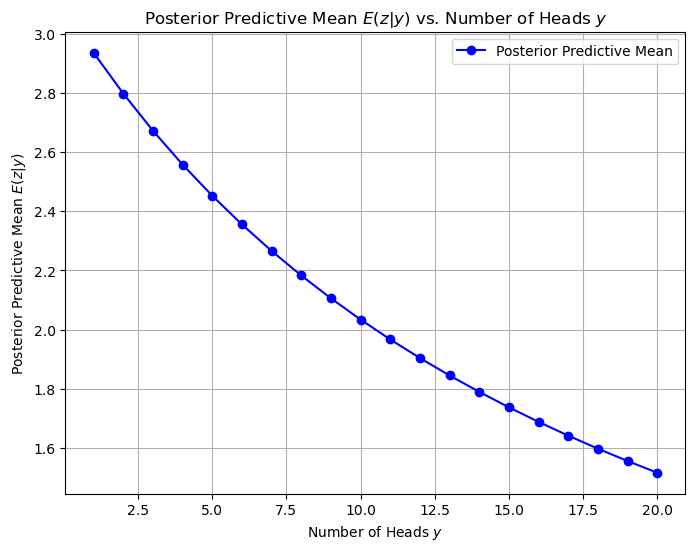

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def posterior_predictive_mean(alpha, beta, n, y):
    """
    Calculate the posterior predictive mean E(z | y).
    
    Parameters:
    alpha : float : prior alpha parameter (shape parameter)
    beta : float : prior beta parameter (shape parameter)
    n : int : number of tosses
    y : int : number of heads
    
    Returns:
    float : posterior predictive mean E(z | y)
    """
    numerator = alpha + beta + n - 1
    denominator = alpha + y - 1
    return numerator / denominator

# Example parameters
alpha = 20.3
beta = 20.3
n = 20

# Values of y (number of heads) from 1 to 20
y_values = np.arange(1, 21)
posterior_means = [posterior_predictive_mean(alpha, beta, n, y) for y in y_values]

# Plotting the posterior predictive mean vs. number of heads y
plt.figure(figsize=(8, 6))
plt.plot(y_values, posterior_means, marker='o', linestyle='-', color='b', label='Posterior Predictive Mean')

plt.title('Posterior Predictive Mean $E(z | y)$ vs. Number of Heads $y$')
plt.xlabel('Number of Heads $y$')
plt.ylabel('Posterior Predictive Mean $E(z | y)$')
plt.grid(True)
plt.legend()
plt.show()


(d) Here, $ \psi $ represents the average of a very large number of independent realizations of the random variable $ z $ in part (c). Therefore, approximately,

$$
\psi \approx E(z | y, \theta) = \frac{1}{\theta}.
$$
The posterior predictive density of $ \psi $ is given by:

$$
f(\psi | y ) = f(\theta | y ) \frac{d\theta}{d\psi}
$$

where $ \theta = \psi^{-1} $ and

$$
\frac{d\theta}{d\psi} = -\psi^{-2}.
$$

Thus, the posterior predictive density is:

$$
f(\psi | y ) = \frac{(1/\psi)^{a-1} (1 - 1/\psi)^{b-1}}{B(a,b)} \times \frac{1}{\psi^2}, \quad \psi > 1.
$$

This simplifies to:

$$
f(\psi | y ) = \frac{(\psi - 1)^{b-1}}{\psi^{a+b} B(a,b)}, \quad \psi > 1.
$$

The posterior predictive mean of $ \psi $ is:

$$
E(\psi | y ) = \int_1^\infty \psi f(\psi | y ) d\psi.
$$

This simplifies to:

$$
E(\psi | y ) = \frac{B(a-1, b)}{B(a, b)}.
$$

By analogy with the integrand, we obtain the same expression as for $ E(z | y) $ and $ E(1/\theta | y) $ in part (c), namely:

$$
E(\psi | y ) = \frac{\alpha + \beta + n - 1}{\alpha + y - 1}.
$$


In [3]:
import numpy as np
from scipy.stats import beta, gamma

# Parameters for the beta distribution
alpha = 20.3
beta_param = 20.3
n_tosses = 20
n_heads = 6

# (c) Expected number of tosses until the next head
def expected_tosses_until_next_head(alpha, beta_param):
    # E(z | y) = 1/(α + y - 1)
    expected_value = 1 / (alpha + beta_param + n_heads - 1)
    return expected_value

E_z = expected_tosses_until_next_head(alpha, beta_param)
print(f"Expected number of tosses until the next head: {E_z:.3f}")

# (d) Average of a large number of independent realizations of z
def average_of_realizations(E_z):
    # ψ = E(z | y, θ) = 1/θ
    average_psi = E_z  # Since E(z | y, θ) = 1/θ
    return average_psi

average_psi = average_of_realizations(E_z)
print(f"Average of independent realizations of z (ψ): {average_psi:.3f}")


Expected number of tosses until the next head: 0.022
Average of independent realizations of z (ψ): 0.022


Expected number of tosses until the next head: 0.022
Expected value of theta: 0.434
Average of independent realizations of z (ψ): 0.022


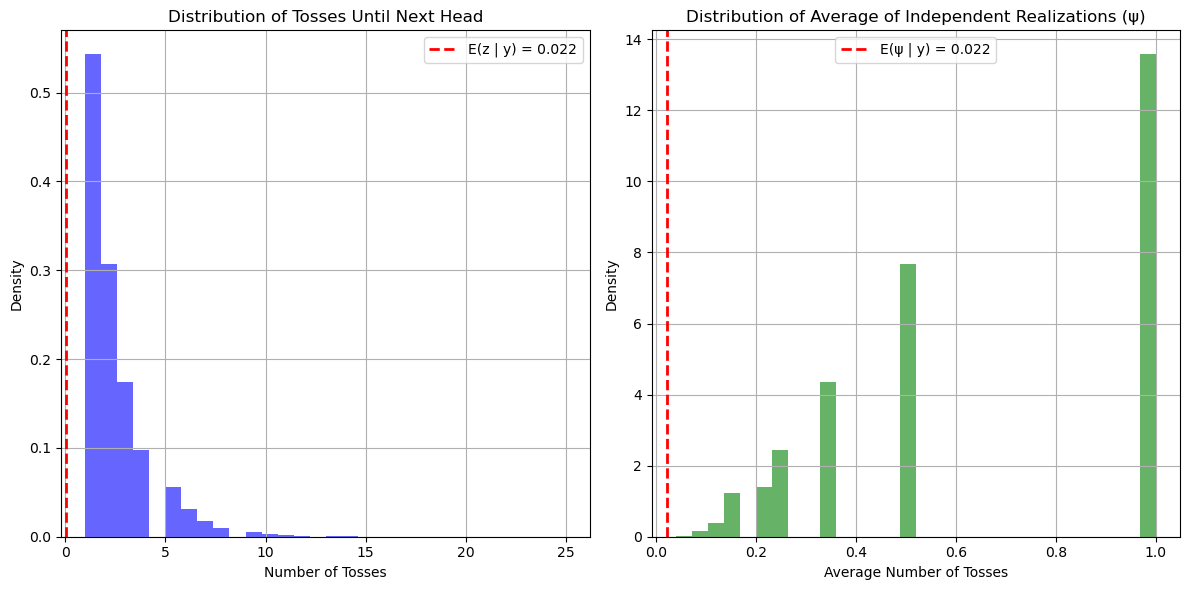

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the beta distribution
alpha = 20.3
beta_param = 20.3
n_tosses = 20
n_heads = 6

# (c) Expected number of tosses until the next head
def expected_tosses_until_next_head(alpha, beta_param):
    # E(z | y) = 1/(α + β + n - 1)
    expected_value = 1 / (alpha + beta_param + n_heads - 1)
    return expected_value

E_z = expected_tosses_until_next_head(alpha, beta_param)
print(f"Expected number of tosses until the next head: {E_z:.3f}")

# Calculate the expected value of theta
def expected_theta(alpha, beta_param, n_heads):
    E_theta = (alpha + n_heads) / (alpha + beta_param + n_tosses)
    return E_theta

theta = expected_theta(alpha, beta_param, n_heads)
print(f"Expected value of theta: {theta:.3f}")

# (d) Average of a large number of independent realizations of z
average_psi = E_z  # ψ = E(z | y, θ) = 1/θ, directly using E_z here
print(f"Average of independent realizations of z (ψ): {average_psi:.3f}")

# Simulate a large number of tosses until the next head
num_simulations = 1000000
tosses_until_next_head = np.random.geometric(theta, size=num_simulations)

# Plotting the results
plt.figure(figsize=(12, 6))

# Histogram of the number of tosses until the next head
plt.subplot(1, 2, 1)
plt.hist(tosses_until_next_head, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(E_z, color='red', linestyle='dashed', linewidth=2, label=f'E(z | y) = {E_z:.3f}')
plt.title('Distribution of Tosses Until Next Head')
plt.xlabel('Number of Tosses')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Histogram of the average of independent realizations of z
plt.subplot(1, 2, 2)
plt.hist(1 / (tosses_until_next_head), bins=30, density=True, alpha=0.6, color='g')
plt.axvline(average_psi, color='red', linestyle='dashed', linewidth=2, label=f'E(ψ | y) = {average_psi:.3f}')
plt.title('Distribution of Average of Independent Realizations (ψ)')
plt.xlabel('Average Number of Tosses')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Exercise 6: Prediction in the Normal-Normal Model (with Known Variance)

Consider the Bayesian model given by:

$$
(y_1, \ldots, y_n \mid \mu) \sim \text{iid } N(\mu, \sigma^2)
$$

with the prior for $ \mu $:

$$
\mu \sim N(\mu_0, \sigma_0^2)
$$

Suppose we have data in the form of the vector $ \mathbf{y} = (y_1, \ldots, y_n) $. We are interested in the future values:

$$
(x_1, \ldots, x_m \mid \mathbf{y}, \mu) \sim \text{iid } N(\mu, \sigma^2)
$$

## 1. Posterior Distribution of $ \mu $

Given the prior and likelihood, we can derive the posterior distribution of $ \mu $. The posterior distribution is obtained using Bayes' theorem:

$$
p(\mu \mid \mathbf{y}) \propto p(\mathbf{y} \mid \mu) p(\mu)
$$

### Likelihood

The likelihood of the data given $ \mu $ is:

$$
p(\mathbf{y} \mid \mu) = \prod_{i=1}^n N(y_i \mid \mu, \sigma^2) = \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^n \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2\right)
$$

### Prior

The prior distribution is:

$$
p(\mu) = N(\mu \mid \mu_0, \sigma_0^2) = \frac{1}{\sqrt{2\pi \sigma_0^2}} \exp\left(-\frac{1}{2\sigma_0^2}(\mu - \mu_0)^2\right)
$$

### Posterior Distribution

Combining the likelihood and the prior, we have:

$$
p(\mu \mid \mathbf{y}) \propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2 - \frac{1}{2\sigma_0^2}(\mu - \mu_0)^2\right)
$$

This results in a normal distribution for the posterior of $ \mu $:

$$
\mu \mid \mathbf{y} \sim N\left(\mu_n, \sigma_n^2\right)
$$

where 

$$
\sigma_n^2 = \left(\frac{1}{\sigma^2} + \frac{1}{\sigma_0^2}\right)^{-1}, \quad \mu_n = \sigma_n^2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n y_i}{\sigma^2} \right)
$$

## 2. Posterior Predictive Distribution

Now, to find the posterior predictive distribution for 

$$
x = \frac{x_1 + \ldots + x_m}{m}:
$$

The future observations $ x_i $ are distributed as:

$$
(x_1, \ldots, x_m \mid \mu) \sim N(\mu, \sigma^2)
$$

The predictive distribution is obtained by integrating over the posterior distribution of $ \mu $:

$$
p(x \mid \mathbf{y}) = \int p(x \mid \mu) p(\mu \mid \mathbf{y}) \, d\mu
$$

### 2.1 Predictive Distribution Calculation

Given that $ x \mid \mu \sim N(\mu, \sigma^2) $, we have:

$$
p(x \mid \mu) = N(x \mid \mu, \sigma^2)
$$

Integrating over the posterior distribution $ p(\mu \mid \mathbf{y}) $:

$$
p(x \mid \mathbf{y}) = \int N(x \mid \mu, \sigma^2) N(\mu \mid \mu_n, \sigma_n^2) \, d\mu
$$

This integral results in:

$$
p(x \mid \mathbf{y}) \sim N\left(\mu_n, \sigma_n^2 + \sigma^2\right)
$$

## 3. Special Case: A Priori Ignorance Regarding $ \mu $

If we assume a priori ignorance regarding $ \mu $, we can set $ \mu_0 $ to a value such that it has a wide prior variance \( \sigma_0^2 \to \infty \). In this case, the prior becomes non-informative and can be considered as uniform.

The posterior becomes:

$$
\mu \mid \mathbf{y} \sim N\left(\bar{y}, \sigma^2/n\right)
$$

where $ \bar{y} $ is the sample mean of the observed data.

Thus, the posterior predictive distribution is:

$$
p(x \mid \mathbf{y}) \sim N\left(\bar{y}, \sigma^2/n + \sigma^2\right)
$$


## Solution: Posterior Distribution and Predictive Distribution

By Exercise 5, the posterior distribution of $ \mu $ is given by:

$$
(\mu \mid y) \sim N(\mu^*, \sigma^{*2})
$$

where:

$$
\mu^* = (1 - k) \mu_0 + k y, \quad \sigma^{*2} = \frac{\sigma^2}{k^2}, \quad k = \frac{1}{1 + \frac{\sigma^2}{n \sigma_0^2}}
$$

Now, the distribution of future observations $ x $ given $ y $ and $ \mu $ is:

$$
(x \mid y, \mu) \sim N(\mu, \frac{\sigma^2}{m})
$$

Thus, the marginal distribution of $ x $ given $ y $ can be expressed as:

$$
f(x \mid y) = \int f(x \mid y, \mu) f(\mu \mid y) \, d\mu
$$

Substituting the known distributions:

$$
f(x \mid y) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi \frac{\sigma^2}{m}}} \exp\left(-\frac{(x - \mu)^2}{2 \frac{\sigma^2}{m}}\right) \cdot \frac{1}{\sqrt{2\pi \sigma^{*2}}} \exp\left(-\frac{(\mu - \mu^*)^2}{2 \sigma^{*2}}\right) \, d\mu
$$

### Simplifying the Integral

This can be simplified as:

$$
f(x \mid y) \propto \int \exp\left(-\frac{(x - \mu)^2}{2 \frac{\sigma^2}{m}}\right) \exp\left(-\frac{(\mu - \mu^*)^2}{2 \sigma^{*2}}\right) d\mu
$$

This integral involves the exponent of a quadratic in both $ x $ and $ \mu $ and must equal the exponent of a quadratic in $ x $. Therefore, it follows that:

$$
(x \mid y) \sim N(\eta, \delta^2)
$$

where $ \eta $ and $ \delta^2 $ are to be determined.

### Determining $ \eta $ and $ \delta^2 $

1. **Mean $ \eta $**:

The expected value of $ x $ given $ y $ is:

$$
\eta = E(x \mid y) = E[E(x \mid y, \mu) \mid y] = E[\mu \mid y] = \mu^*
$$

2. **Variance $ \delta^2 $**:

The variance of $ x $ given $ y $ is:

$$
\delta^2 = V(x \mid y) = E[V(x \mid y, \mu) \mid y] + V[E(x \mid y, \mu) \mid y]
$$

Calculating the components:

- The first term is:
  $$
  E[V(x \mid y, \mu) \mid y] = \frac{\sigma^2}{m}
  $$

- The second term involves the variance of the posterior distribution:
  $$
  V[E(x \mid y, \mu) \mid y] = V[\mu \mid y] = \sigma^{*2}
  $$

Thus, we have:

$$
\delta^2 = \frac{\sigma^2}{m} + \sigma^{*2}
$$

### General Result

Overall, we have:

$$
(x \mid y) \sim N\left(\mu^*, \sigma^{*2} + \frac{\sigma^2}{m}\right)
$$

Substituting $ \mu^* $ and $ \sigma^{*2} $:

$$
(x \mid y) \sim N\left((1 - k) \mu_0 + k y, k^2 + \frac{\sigma^2}{n m}\right)
$$

### Special Case: A Priori Ignorance Regarding $ \mu $

In the special case where there is no prior information regarding the normal mean $ \mu $, we can set $ \sigma_0 = \infty $ (leading to a uniform prior), thus:

$$
k = 1
$$

Therefore, we have:

$$
(x \mid y) \sim N\left(y, \frac{\sigma^2}{n} + \frac{\sigma^2}{m}\right)
$$


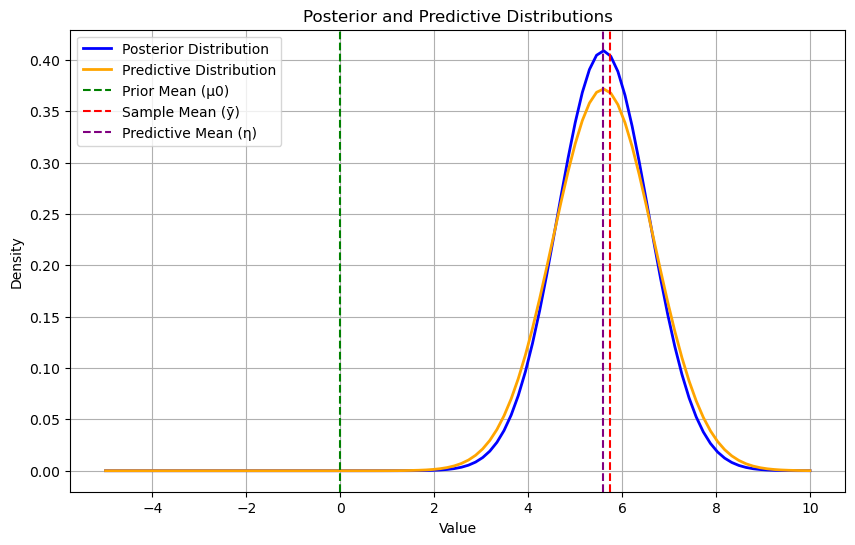

Posterior Mean (mu*): 5.60
Posterior Variance (sigma*^2): 0.95
Predictive Mean (eta): 5.60
Predictive Variance (delta^2): 1.15
Future Predictions: [5.75266272 7.15883576 6.41483698 5.7286562  6.07443702]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Define the parameters
# Known parameters
sigma2 = 1.0          # Known variance of the likelihood
sigma0_squared = 4.0  # Prior variance
mu0 = 0.0             # Prior mean
n = 10                # Number of observations
m = 5                 # Number of future observations

# Step 2: Simulate data (y)
np.random.seed(0)  # For reproducibility
y = np.random.normal(loc=5.0, scale=np.sqrt(sigma2), size=n)  # Simulate data from N(5, 1)

# Step 3: Compute Posterior Distribution
# Calculate posterior parameters
y_bar = np.mean(y)  # Sample mean
k = 1 / (1 + (sigma2 / (n * sigma0_squared)))  # Weighting factor
mu_star = (1 - k) * mu0 + k * y_bar  # Posterior mean
sigma_star_squared = sigma2 * k**2  # Posterior variance

# Step 4: Predict Future Observations
# Predictive distribution parameters
sigma_m_squared = sigma2 / m  # Variance of future observations
predictive_mean = mu_star      # Predictive mean
predictive_variance = sigma_star_squared + sigma_m_squared  # Predictive variance

# Generate future predictions
future_predictions = np.random.normal(loc=predictive_mean, scale=np.sqrt(predictive_variance), size=m)

# Step 5: Plot Results
x = np.linspace(-5, 10, 100)  # Range for x values
posterior_dist = norm.pdf(x, mu_star, np.sqrt(sigma_star_squared))
predictive_dist = norm.pdf(x, predictive_mean, np.sqrt(predictive_variance))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_dist, label='Posterior Distribution', color='blue', lw=2)
plt.plot(x, predictive_dist, label='Predictive Distribution', color='orange', lw=2)
plt.axvline(mu0, color='green', linestyle='--', label='Prior Mean (μ0)')
plt.axvline(y_bar, color='red', linestyle='--', label='Sample Mean (ȳ)')
plt.axvline(predictive_mean, color='purple', linestyle='--', label='Predictive Mean (η)')
plt.title('Posterior and Predictive Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Output results
print(f"Posterior Mean (mu*): {mu_star:.2f}")
print(f"Posterior Variance (sigma*^2): {sigma_star_squared:.2f}")
print(f"Predictive Mean (eta): {predictive_mean:.2f}")
print(f"Predictive Variance (delta^2): {predictive_variance:.2f}")
print(f"Future Predictions: {future_predictions}")


## Prediction in the Normal-Gamma Model (with Known Mean)

Consider the Bayesian model given by:

$$
(y_1, \ldots, y_n \mid \lambda) \sim \text{iid } N\left(\mu, \frac{1}{\lambda}\right)
$$

with the prior for $ \lambda $:

$$
\lambda \sim \text{Gamma}(\alpha, \beta)
$$

Assume we have data in the form of the vector $ \mathbf{y} = (y_1, \ldots, y_n) $.

We are interested in predicting future values:

$$
(x_1, \ldots, x_m \mid \mathbf{y}, \lambda) \sim \text{iid } N\left(\mu, \frac{1}{\lambda}\right)
$$

## Posterior Distribution of $ \lambda $

The likelihood of the observed data given $ \lambda $ is:

$$
p(\mathbf{y} \mid \lambda) = \prod_{i=1}^n N(y_i \mid \mu, \frac{1}{\lambda}) = \left( \frac{\lambda}{2\pi} \right)^{n/2} \exp\left(-\frac{\lambda}{2} \sum_{i=1}^n (y_i - \mu)^2\right)
$$

The prior distribution for $ \lambda $ is given by:

$$
p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}
$$

###  Posterior Distribution of $ \lambda $

Using Bayes' theorem, the posterior distribution of $ \lambda $ is:

$$
p(\lambda \mid \mathbf{y}) \propto p(\mathbf{y} \mid \lambda) p(\lambda)
$$

Substituting the likelihood and prior, we have:

$$
p(\lambda \mid \mathbf{y}) \propto \lambda^{\alpha + \frac{n}{2} - 1} \exp\left(-\left(\beta + \frac{1}{2} \sum_{i=1}^n (y_i - \mu)^2\right) \lambda\right)
$$

Thus, the posterior distribution of $ \lambda $ follows a Gamma distribution:

$$
\lambda \mid \mathbf{y} \sim \text{Gamma}\left(\alpha + \frac{n}{2}, \beta + \frac{1}{2} \sum_{i=1}^n (y_i - \mu)^2\right)
$$

## Posterior Predictive Distribution

To find the posterior predictive distribution of $ x = \frac{x_1 + \ldots + x_m}{m} $, we need to consider:

$$
p(x \mid \mathbf{y}) = \int p(x \mid \mathbf{y}, \lambda) p(\lambda \mid \mathbf{y}) \, d\lambda
$$

###  Predictive Distribution Calculation

Given that:

$$
p(x \mid \mathbf{y}, \lambda) \sim N\left(\mu, \frac{1}{\lambda}\right)
$$

we have:

$$
p(x \mid \mathbf{y}, \lambda) = \frac{\lambda^{1/2}}{\sqrt{2\pi}} \exp\left(-\frac{\lambda}{2}(x - \mu)^2\right)
$$

Thus, the posterior predictive distribution becomes:

$$
p(x \mid \mathbf{y}) = \int \frac{\lambda^{1/2}}{\sqrt{2\pi}} \exp\left(-\frac{\lambda}{2}(x - \mu)^2\right) p(\lambda \mid \mathbf{y}) \, d\lambda
$$

###  Result of the Integral

The integral above can be solved using the properties of the Gamma distribution. The resulting predictive distribution is:

$$
p(x \mid \mathbf{y}) \sim t_{2\alpha + n}\left(\mu, \frac{1}{\beta + \frac{1}{2} \sum_{i=1}^n (y_i - \mu)^2}\right)
$$

##  Special Case: A Priori Ignorance Regarding $ \lambda $

If we assume a priori ignorance regarding $ \lambda $, we can set $ \alpha = 0 $ and $ \beta = 0 $. In this case, the prior for $ \lambda $ becomes non-informative.

Consequently, the posterior predictive distribution simplifies to:

$$
p(x \mid \mathbf{y}) \sim t_n\left(\mu, 1\right)
$$

where $ t_n $ is the Student's t-distribution with $ n $ degrees of freedom.


# Posterior Predictive Distribution in the Normal-Gamma Model

We are tasked with finding the posterior predictive distribution of \(x\) in the normal-gamma model with the following assumptions:

1. The observed data $ (y_1, \dots, y_n \mid \lambda) \sim \text{iid } N(\mu, 1/\lambda) $
2. The prior distribution on $ \lambda $ is $ \lambda \sim \text{Gamma}(\alpha, \beta) $
3. We are interested in predicting future values $ (x_1, \dots, x_m \mid y, \lambda) \sim \text{iid } N(\mu, 1/\lambda) $

The goal is to find the posterior predictive distribution of the average of future values, $ x = \frac{x_1 + \dots + x_m}{m} $.

## Posterior Predictive Distribution Derivation

The posterior predictive distribution is given by the integral:

$$
f(x \mid y) = \int f(x \mid y, \lambda) f(\lambda \mid y) d\lambda
$$

Substituting the likelihood and posterior distributions:

$$
f(x \mid y) \propto \int_0^\infty \lambda^{m/2} \exp\left\{ -\frac{\lambda (x - \mu)^2}{2} \right\} \lambda^{\alpha - 1} \exp(-\lambda \beta) d\lambda
$$

This simplifies to:

$$
f(x \mid y) \propto \int_0^\infty \lambda^{\alpha + m/2 - 1} \exp\left\{ -\lambda \left( \beta + \frac{(x - \mu)^2}{2} \right) \right\} d\lambda
$$

Evaluating the integral yields:

$$
f(x \mid y) \propto \left(1 + \frac{(x - \mu)^2}{2\alpha}\right)^{-(2\alpha + 1)/2}
$$

Define:

$$
Q = \frac{m(x - \mu)^2}{2b}
$$

So:

$$
f(Q \mid y) \propto \left(1 + \frac{Q^2}{2\alpha}\right)^{-(2\alpha + 1)/2}
$$

This implies that:

$$
Q \mid y \sim t(2\alpha)
$$

Thus, the predictive distribution for $x$ is:

$$
\frac{x - \mu}{\sqrt{\frac{s_\mu^2}{m}}} \sim t(n + 2\alpha)
$$

## Special Case: No Prior Information on Precision $ \lambda $

If there is no prior information regarding $ \lambda $, we set $ \alpha = 0 $ and $ \beta = 0 $, implying a non-informative prior:

$$
f(\lambda) \propto \frac{1}{\lambda}, \quad \lambda > 0
$$

In this case, the predictive distribution simplifies to:

$$
\frac{x - \mu}{\sqrt{\frac{s_\mu^2}{m}}} \sim t(n)
$$


# Posterior Predictive Distribution Derivation

We want to compute the posterior predictive distribution:

$$
f(x \mid y) = \int_0^\infty f(x \mid y, \lambda) f(\lambda \mid y) d\lambda
$$

Substituting the likelihood and posterior distributions, we get:

$$
f(x \mid y) \propto \int_0^\infty \lambda^{m/2} \exp\left( -\frac{\lambda (x - \mu)^2}{2} \right) \lambda^{a - 1} \exp(-\lambda b) d\lambda
$$

This can be rewritten as:

$$
f(x \mid y) \propto \int_0^\infty \lambda^{a + m/2 - 1} \exp\left( -\lambda \left( b + \frac{(x - \mu)^2}{2} \right) \right) d\lambda
$$

Using the properties of the Gamma function, the integral evaluates to:

$$
f(x \mid y) \propto \left( b + \frac{(x - \mu)^2}{2} \right)^{-(2a + 1)/2}
$$

This can be simplified further:

$$
f(x \mid y) \propto \left( 1 + \frac{m(x - \mu)^2}{2ab} \right)^{-(2a + 1)/2}
$$

Now, define:

$$
Q = \frac{m(x - \mu)}{\sqrt{2ab}}
$$

Hence, the expression becomes:

$$
f(Q \mid y) \propto \left( 1 + \frac{Q^2}{2a} \right)^{-(2a + 1)/2}
$$

This shows that \( Q \) follows a Student's t-distribution:

$$
Q \mid y \sim t_{2a}
$$

Therefore, the posterior predictive distribution for \(x\) is:

$$
\frac{x - \mu}{\sqrt{\frac{s_\mu^2}{m}}} \sim t_{2a}
$$


## Posterior Predictive Distribution Transformation

We begin by defining $ Q $ as:

$$
Q = \frac{m(x - \mu)}{\sqrt{2ab}}
$$

Thus, $ x $ can be written as:

$$
x = \mu + Q
$$

Using the transformation rule, the density function for $ Q $ is related to the density function for $ x $ by:

$$
f(Q \mid y) = f(x \mid y) \left| \frac{dx}{dQ} \right|
$$

Now, differentiate $ x = \mu + Q $:

$$
\frac{dx}{dQ} = 1
$$

Substitute this into the transformation:

$$
f(Q \mid y) \propto f(x \mid y)
$$

We know from the earlier derivation:

$$
f(x \mid y) \propto \left( 1 + \frac{Q^2}{2a} \right)^{-(2a + 1)/2}
$$

Thus, the density function for $ Q $ is:

$$
f(Q \mid y) \propto \left( 1 + \frac{Q^2}{2a} \right)^{-(2a + 1)/2}
$$


# Posterior Predictive Distribution

The posterior predictive distribution is given by:

$$
f(x \mid y) = \int_0^\infty f(x \mid y, \lambda) f(\lambda \mid y) d\lambda
$$

Substituting the respective likelihood and posterior distributions:

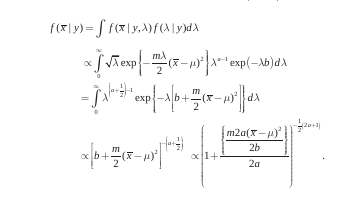

$$
f(x \mid y) \propto \int_0^\infty \lambda^{m/2} \exp\left( -\frac{\lambda (x - \mu)^2}{2} \right) \lambda^{a - 1} \exp(-\lambda b) d\lambda
$$

This simplifies to:

$$
f(x \mid y) \propto \int_0^\infty \lambda^{a + m/2 - 1} \exp\left( -\lambda \left( b + \frac{(x - \mu)^2}{2} \right) \right) d\lambda
$$

After integrating, we get:

$$
f(x \mid y) \propto \left( b + \frac{(x - \mu)^2}{2} \right)^{-(2a + 1)/2}
$$

### Transformation to \( Q \)

Now, let:

$$
Q = \frac{m(x - \mu)}{\sqrt{2ab}}
$$

Thus, \( x \) can be written as:

$$
x = \mu + Q
$$

By the transformation rule:

$$
f(Q \mid y) = f(x \mid y) \left| \frac{dx}{dQ} \right|
$$

Since \( \frac{dx}{dQ} = 1 \), we have:

$$
f(Q \mid y) \propto \left( 1 + \frac{Q^2}{2a} \right)^{-(2a + 1)/2}
$$

This implies that \( Q \mid y \) follows a Student's t-distribution with \( 2a \) degrees of freedom:

$$
Q \mid y \sim t_{2a}
$$

### General Form for Posterior Predictive Distribution

Therefore, the posterior predictive distribution for $ x $ is:

$$
\frac{x - \mu}{\sqrt{\frac{s_\mu^2}{m}}} \sim t_{2a}
$$

### Special Case: No Prior Information on $ \lambda $

If there is no prior information regarding the precision parameter $ \lambda $ (i.e., $ \alpha = \beta = 0 $), we have:

$$
f(\lambda) \propto \frac{1}{\lambda}, \quad \lambda > 0
$$

In this case, the posterior predictive distribution simplifies to:

$$
\frac{x - \mu}{\sqrt{\frac{s_\mu^2}{m}}} \sim t_n
$$


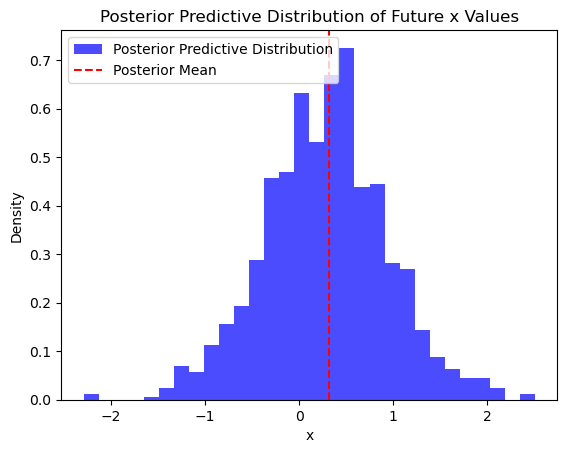

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters for the prior distribution (Normal-Gamma model)
alpha = 2    # Shape parameter of the Gamma distribution (α)
beta = 1     # Rate parameter of the Gamma distribution (β)
mu = 0       # Known mean (µ)
n = 10       # Number of observed data points
m = 5        # Number of future data points

# Observed data (y)
np.random.seed(42)  # For reproducibility
y = np.random.normal(mu, np.sqrt(1 / (alpha / beta)), size=n)

# Posterior parameters
s2_y = np.var(y, ddof=1)  # Sample variance
mu_post = np.mean(y)      # Posterior mean
alpha_post = alpha + n / 2
beta_post = beta + 0.5 * np.sum((y - mu_post)**2)

# Posterior predictive distribution
# The predictive distribution follows a t-distribution with (n + 2α) degrees of freedom
nu_post = 2 * alpha_post  # Degrees of freedom for the t-distribution
sigma_pred = np.sqrt((beta_post / alpha_post) * (1 + 1/m))  # Predictive variance

# Simulate predictive distribution for future x values
x_pred = mu_post + sigma_pred * t.rvs(df=nu_post, size=1000)

# Plot the posterior predictive distribution
plt.hist(x_pred, bins=30, density=True, alpha=0.7, color='b', label="Posterior Predictive Distribution")
plt.axvline(mu_post, color='r', linestyle='--', label='Posterior Mean')
plt.title('Posterior Predictive Distribution of Future x Values')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()
